Sample data:
   library_visits_per_week  lab_hours_per_week  event_participation_count  \
0                        4            6.635505                          3   
1                        1            2.021214                          1   
2                        3            5.049284                          3   
3                        3            5.179912                          2   
4                        2            6.506609                          3   

   study_room_bookings  avg_assignment_score  attendance_rate  is_at_risk  
0                    2             71.973273        77.935190           0  
1                    1             61.872720        85.604814           0  
2                    1             84.985826        65.291949           0  
3                    1             82.477568        81.411693           0  
4                    3             81.899114        91.184576           0  


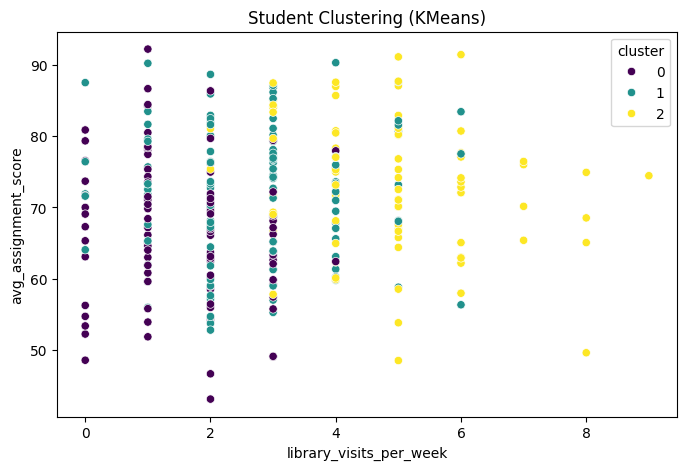


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.89      0.94        18

    accuracy                           0.98        90
   macro avg       0.99      0.94      0.96        90
weighted avg       0.98      0.98      0.98        90


Confusion Matrix:
[[72  0]
 [ 2 16]]


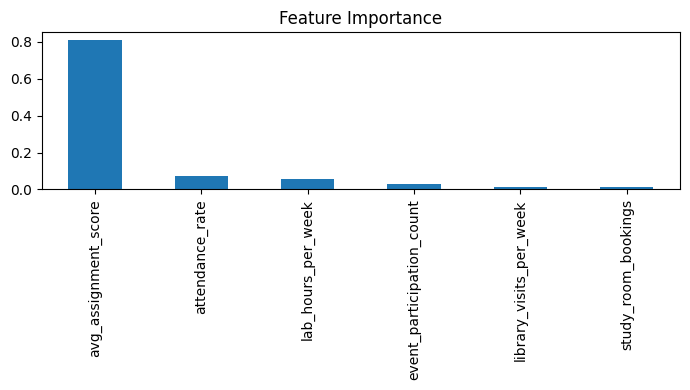

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Create synthetic dataset
np.random.seed(42)
n_students = 300

data = {
    'library_visits_per_week': np.random.poisson(3, n_students),
    'lab_hours_per_week': np.random.normal(5, 2, n_students).clip(0),
    'event_participation_count': np.random.poisson(2, n_students),
    'study_room_bookings': np.random.poisson(1, n_students),
    'avg_assignment_score': np.random.normal(70, 10, n_students).clip(0, 100),
    'attendance_rate': np.random.normal(80, 10, n_students).clip(0, 100),
}

df = pd.DataFrame(data)

# Rule to label students at risk
df['is_at_risk'] = (
    (df['avg_assignment_score'] < 60) |
    (df['attendance_rate'] < 60)
).astype(int)

print("Sample data:")
print(df.head())

# Step 2: Clustering to find behavior groups
scaler = StandardScaler()
features = df.drop('is_at_risk', axis=1)
scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled)

# Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='library_visits_per_week', y='avg_assignment_score', hue='cluster', palette='viridis')
plt.title("Student Clustering (KMeans)")
plt.show()

# Step 3: Classification model to predict 'at risk'
X = df.drop(['is_at_risk', 'cluster'], axis=1)
y = df['is_at_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(7,4))
feat_imp.plot(kind='bar')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


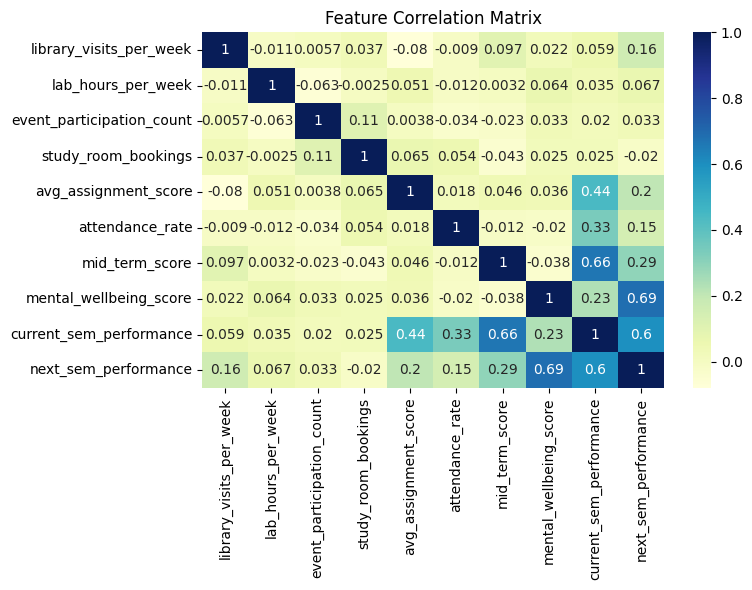

<ipython-input-7-7da90f6c6db3>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='performance_group', data=df, palette='Set2')


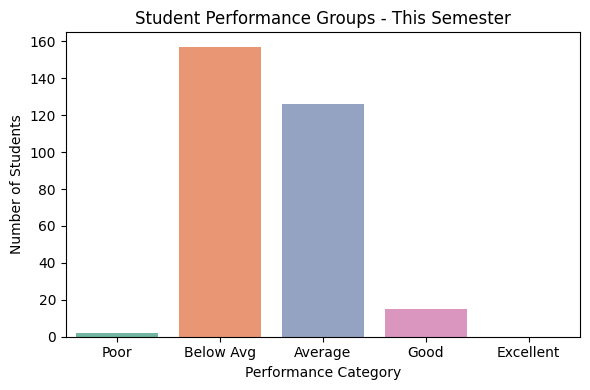

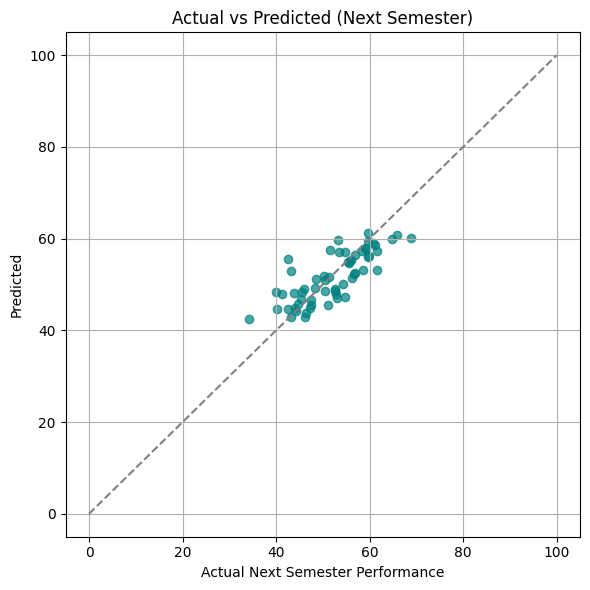

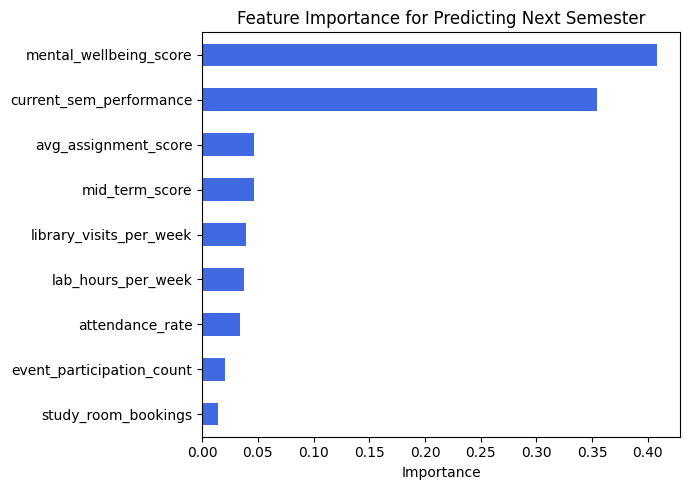


R² Score: 0.625
Mean Absolute Error: 3.48


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Step 1: Simulate data
np.random.seed(42)
n = 300

df = pd.DataFrame({
    'library_visits_per_week': np.random.poisson(4, n),
    'lab_hours_per_week': np.random.normal(6, 2, n).clip(0),
    'event_participation_count': np.random.poisson(2, n),
    'study_room_bookings': np.random.poisson(1, n),
    'avg_assignment_score': np.random.normal(72, 10, n).clip(0, 100),
    'attendance_rate': np.random.normal(80, 10, n).clip(50, 100),
    'mid_term_score': np.random.normal(68, 12, n).clip(0, 100),
    'mental_wellbeing_score': np.random.normal(6, 1.5, n).clip(1, 10),
})

# Final semester performance as combination of features
df['current_sem_performance'] = (
    0.3 * df['avg_assignment_score'] +
    0.3 * df['mid_term_score'] +
    0.2 * df['attendance_rate'] +
    0.1 * df['mental_wellbeing_score'] * 10 +
    0.1 * df['library_visits_per_week'] * 2 +
    np.random.normal(0, 3, n)  # noise
).clip(0, 100).round(1)

# Predicting next sem performance using all above as features
df['next_sem_performance'] = (
    0.5 * df['current_sem_performance'] +
    0.3 * df['mental_wellbeing_score'] * 10 +
    0.2 * df['library_visits_per_week'] * 2 +
    np.random.normal(0, 4, n)
).clip(0, 100).round(1)

# Step 2: Train regression model
features = df.drop(columns=['next_sem_performance'])
target = df['next_sem_performance']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

# Step 3: Visualizations
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

# Performance Group Distribution
plt.figure(figsize=(6, 4))
bins = [0, 50, 65, 75, 85, 100]
labels = ['Poor', 'Below Avg', 'Average', 'Good', 'Excellent']
df['performance_group'] = pd.cut(df['current_sem_performance'], bins=bins, labels=labels)

sns.countplot(x='performance_group', data=df, palette='Set2')
plt.title("Student Performance Groups - This Semester")
plt.xlabel("Performance Category")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()

# Actual vs Predicted Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, predictions, alpha=0.7, color='teal')
plt.plot([0, 100], [0, 100], '--', color='gray')
plt.xlabel("Actual Next Semester Performance")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Next Semester)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Importance
feat_imp = pd.Series(model.feature_importances_, index=features.columns).sort_values(ascending=True)
plt.figure(figsize=(7, 5))
feat_imp.plot(kind='barh', color='royalblue')
plt.title("Feature Importance for Predicting Next Semester")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# Step 4: Metrics
print("\nR² Score:", round(r2_score(y_test, predictions), 3))
print("Mean Absolute Error:", round(mean_absolute_error(y_test, predictions), 2))

<ipython-input-8-9b412689fa72>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='risk_level', data=df, palette='Reds')
<ipython-input-8-9b412689fa72>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='study_habit', data=df, palette='Blues')
<ipython-input-8-9b412689fa72>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='engagement_level', data=df, palette='Greens')
<ipython-input-8-9b412689fa72>:51: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8

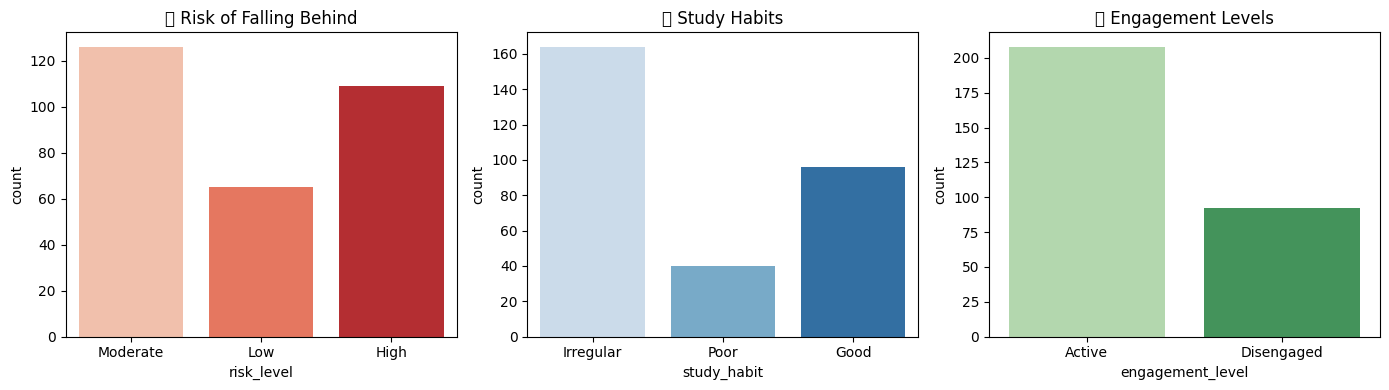


🔍 Classification Report (Risk Prediction):

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        27
         Low       1.00      0.88      0.93        16
    Moderate       0.94      1.00      0.97        32

    accuracy                           0.97        75
   macro avg       0.98      0.96      0.97        75
weighted avg       0.97      0.97      0.97        75



<ipython-input-8-9b412689fa72>:80: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


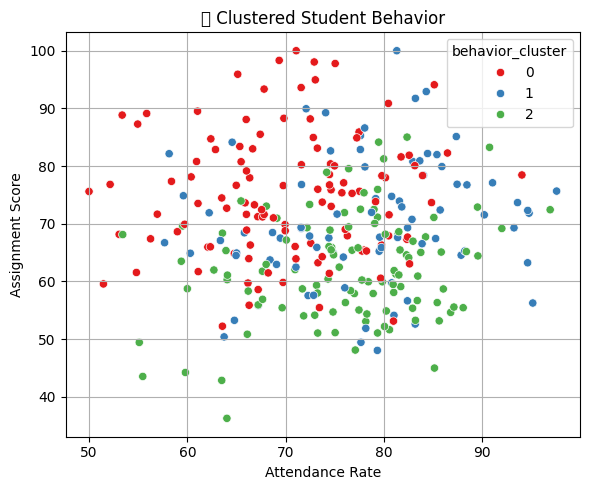

<ipython-input-8-9b412689fa72>:89: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


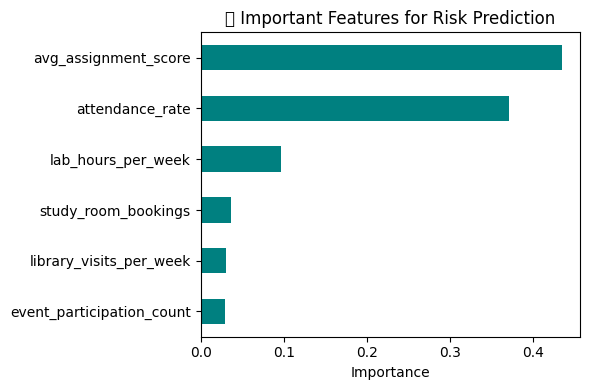

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans

# Step 1: Simulate data
np.random.seed(0)
n = 300
df = pd.DataFrame({
    'library_visits_per_week': np.random.poisson(3, n),
    'lab_hours_per_week': np.random.normal(5, 2, n).clip(0),
    'event_participation_count': np.random.poisson(1.5, n),
    'study_room_bookings': np.random.poisson(2, n),
    'attendance_rate': np.random.normal(75, 10, n).clip(50, 100),
    'avg_assignment_score': np.random.normal(70, 12, n).clip(0, 100),
})

# Define engagement based on usage
df['engagement_level'] = np.where(
    (df['library_visits_per_week'] + df['lab_hours_per_week'] + df['event_participation_count']) > 8,
    'Active', 'Disengaged'
)

# Study habits label
df['study_habit'] = np.where(df['study_room_bookings'] >= 3, 'Good',
                      np.where(df['study_room_bookings'] >= 1, 'Irregular', 'Poor'))

# Risk level based on attendance & assignment score
df['risk_level'] = np.where((df['attendance_rate'] < 65) | (df['avg_assignment_score'] < 60), 'High',
                     np.where((df['attendance_rate'] < 75) | (df['avg_assignment_score'] < 70), 'Moderate', 'Low'))

# Step 2: Visualize Label Distributions
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
sns.countplot(x='risk_level', data=df, palette='Reds')
plt.title("📉 Risk of Falling Behind")

plt.subplot(1, 3, 2)
sns.countplot(x='study_habit', data=df, palette='Blues')
plt.title("📚 Study Habits")

plt.subplot(1, 3, 3)
sns.countplot(x='engagement_level', data=df, palette='Greens')
plt.title("🎯 Engagement Levels")
plt.tight_layout()
plt.show()

# Step 3: Classification – Predict Risk Level
features = df[['library_visits_per_week', 'lab_hours_per_week', 'event_participation_count',
               'study_room_bookings', 'attendance_rate', 'avg_assignment_score']]
target = df['risk_level']

X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n🔍 Classification Report (Risk Prediction):\n")
print(classification_report(y_test, y_pred))

# Step 4: Clustering Students Based on Behavior
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['behavior_cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='attendance_rate', y='avg_assignment_score', hue='behavior_cluster', palette='Set1')
plt.title("🧠 Clustered Student Behavior")
plt.xlabel("Attendance Rate")
plt.ylabel("Assignment Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Feature Importances
importances = pd.Series(model.feature_importances_, index=features.columns).sort_values()
plt.figure(figsize=(6, 4))
importances.plot(kind='barh', color='teal')
plt.title("🧠 Important Features for Risk Prediction")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


<ipython-input-9-163cf0f6b77c>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='engagement_level', y='CGPA', data=df, palette='Set3')


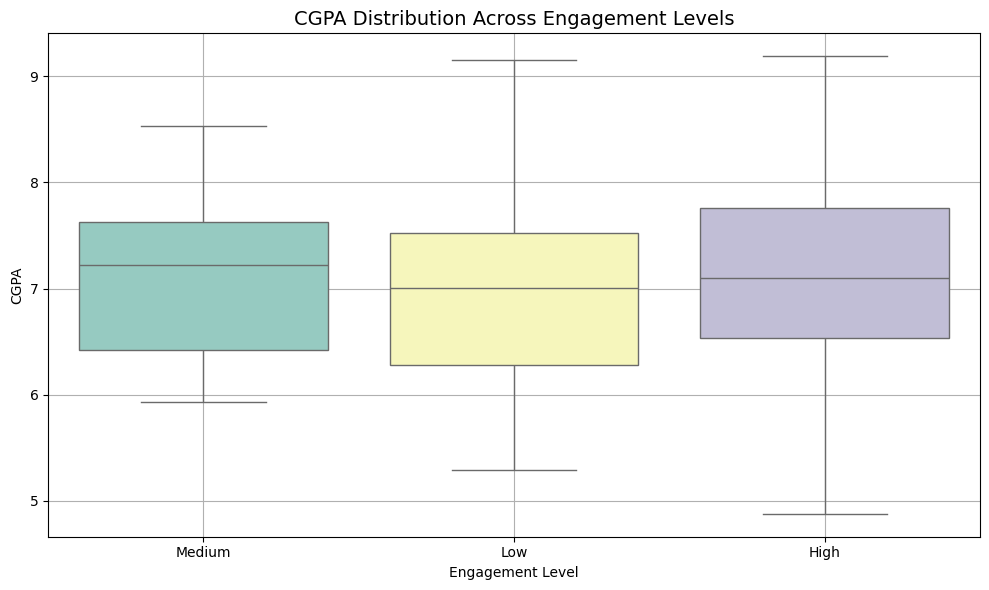

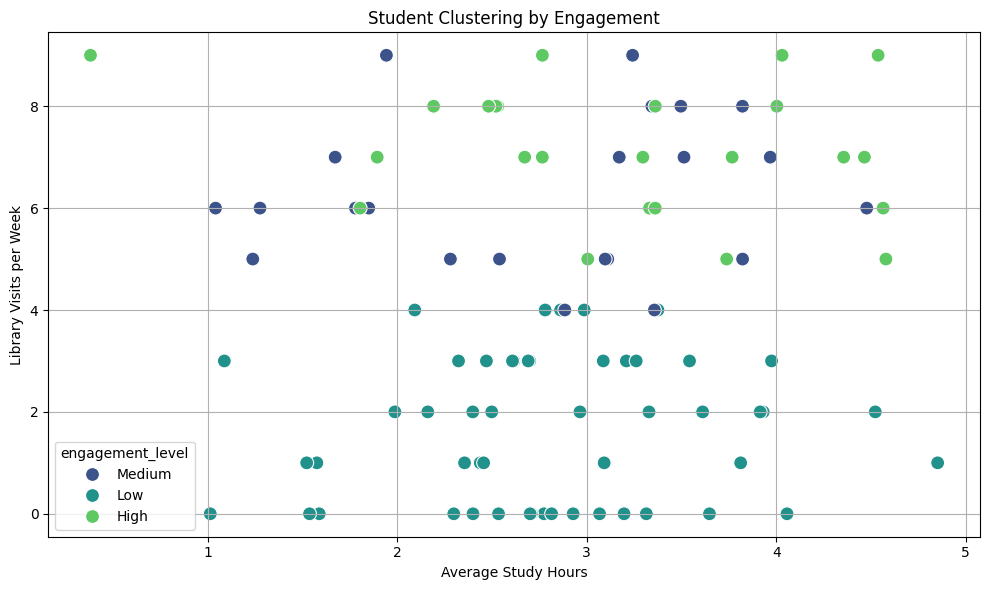

Classification Report:
              precision    recall  f1-score   support

     At Risk       0.33      0.14      0.20         7
      Stable       0.65      0.85      0.73        13

    accuracy                           0.60        20
   macro avg       0.49      0.49      0.47        20
weighted avg       0.54      0.60      0.55        20



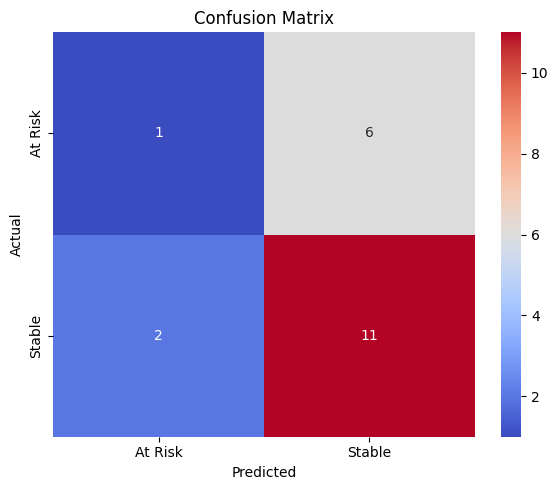

In [9]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Generate synthetic dataset
np.random.seed(42)
data = {
    'student_id': range(1, 101),
    'avg_study_hours': np.random.normal(3, 1, 100).clip(0, None),
    'library_visits_per_week': np.random.randint(0, 10, 100),
    'event_participation': np.random.randint(0, 5, 100),
    'lab_usage_hours': np.random.normal(2, 0.5, 100).clip(0, None),
    'CGPA': np.random.normal(7, 1, 100).clip(0, 10),
}
df = pd.DataFrame(data)

# Step 3: Clustering for Engagement Level
features = df[['avg_study_hours', 'library_visits_per_week', 'event_participation', 'lab_usage_hours']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['engagement_cluster'] = kmeans.fit_predict(features)

# Map clusters to readable engagement labels
cluster_avg = df.groupby('engagement_cluster')[['avg_study_hours', 'library_visits_per_week']].mean()
cluster_map = cluster_avg.mean(axis=1).sort_values().index
cluster_labels = {cluster_map[0]: 'Low', cluster_map[1]: 'Medium', cluster_map[2]: 'High'}
df['engagement_level'] = df['engagement_cluster'].map(cluster_labels)

# Step 4: Classification (Risk Prediction)
df['performance'] = df['CGPA'].apply(lambda x: 'At Risk' if x < 6.5 else 'Stable')

X = df[['avg_study_hours', 'library_visits_per_week', 'event_participation', 'lab_usage_hours']]
y = df['performance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# Step 5: Visualizations
# Engagement vs CGPA
plt.figure(figsize=(10, 6))
sns.boxplot(x='engagement_level', y='CGPA', data=df, palette='Set3')
plt.title("CGPA Distribution Across Engagement Levels", fontsize=14)
plt.xlabel("Engagement Level")
plt.ylabel("CGPA")
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='avg_study_hours', y='library_visits_per_week',
                hue='engagement_level', palette='viridis', s=100)
plt.title("Student Clustering by Engagement")
plt.xlabel("Average Study Hours")
plt.ylabel("Library Visits per Week")
plt.grid(True)
plt.tight_layout()
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, predictions))

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['At Risk', 'Stable'], yticklabels=['At Risk', 'Stable'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [ ]:
# prompt: generate these plots in professional or engaging way

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# ... (Your existing code for data generation and model training) ...

# Updated Visualization Functions with enhanced styling

def visualize_clusters(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='library_visits_per_week', y='avg_assignment_score', hue='cluster', palette='viridis', s=70)
    plt.title("Student Clustering (KMeans)", fontsize=16)
    plt.xlabel("Library Visits per Week", fontsize=12)
    plt.ylabel("Average Assignment Score", fontsize=12)
    plt.grid(True, alpha=0.5)
    plt.tight_layout()
    plt.show()

def plot_feature_importance(model, X):
    feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=feat_imp, y=feat_imp.index, palette="Blues_d")  # Use seaborn barplot
    plt.title("Feature Importance", fontsize=16)
    plt.xlabel("Importance Score", fontsize=12)
    plt.ylabel("Features", fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_correlation_matrix(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5) # Use coolwarm cmap
    plt.title("Feature Correlation Matrix", fontsize=16)
    plt.tight_layout()
    plt.show()


def plot_actual_vs_predicted(y_test, predictions):
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, predictions, alpha=0.7, color='teal')
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray') # Better fit line
  plt.xlabel("Actual Next Semester Performance", fontsize=12)
  plt.ylabel("Predicted Next Semester Performance", fontsize=12)
  plt.title("Actual vs Predicted (Next Semester)", fontsize=16)
  plt.grid(True, alpha=0.5)
  plt.tight_layout()
  plt.show()

# ... (rest of your code) ...


# Example usage of the updated functions (replace with your actual data/models):

# Call the updated visualization functions
visualize_clusters(df) # Assuming 'df' and 'cluster' column exists
plot_feature_importance(model, X)  # Replace 'model' and 'X' with your trained model and features
plot_correlation_matrix(df)
plot_actual_vs_predicted(y_test, predictions)


<ipython-input-10-7288288a1831>:53: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


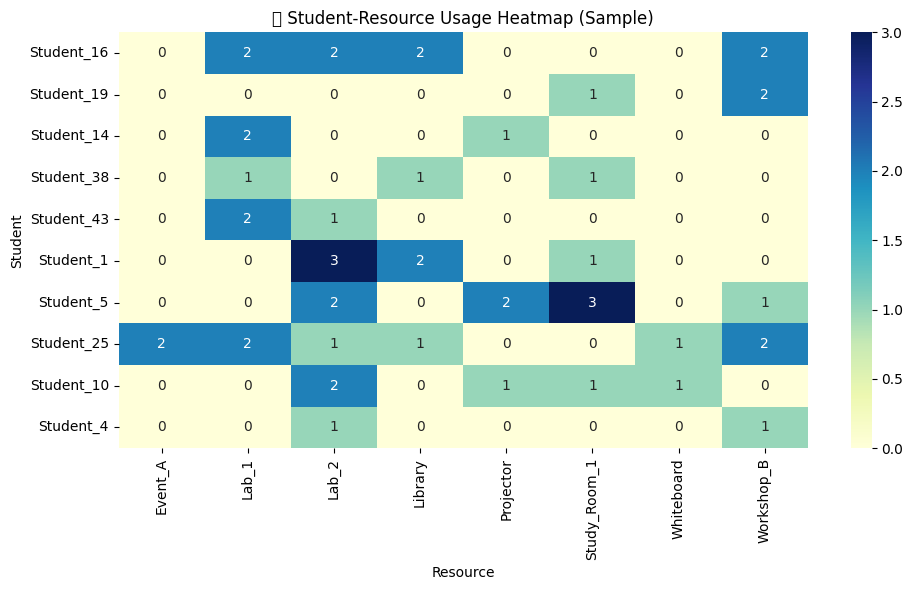

<ipython-input-10-7288288a1831>:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


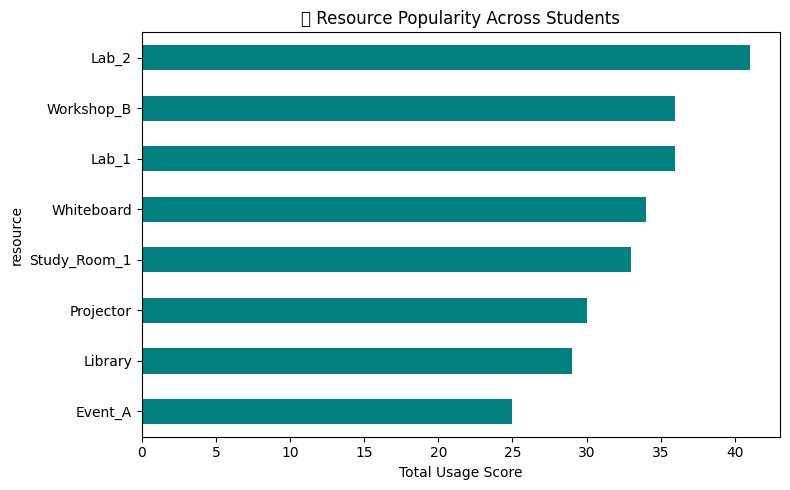


📚 Recommendations for Student_10:
  - Study_Room_1 (score: 1.0)
  - Projector (score: 0.67)
  - Workshop_B (score: 0.33)

📚 Recommendations for Student_25:
  - Lab_2 (score: 0.67)
  - Event_A (score: 0.0)
  - Study_Room_1 (score: 0.0)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [10]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

# Step 1: Generate Synthetic Data
np.random.seed(42)
students = [f"Student_{i}" for i in range(1, 51)]
resources = ['Lab_1', 'Lab_2', 'Study_Room_1', 'Projector', 'Whiteboard', 'Event_A', 'Workshop_B', 'Library']

data = []
for student in students:
    for resource in resources:
        usage_score = np.random.choice([0, 1, 2, 3], p=[0.6, 0.2, 0.15, 0.05])  # how often they used it
        data.append([student, resource, usage_score])

df = pd.DataFrame(data, columns=['student_id', 'resource', 'usage_score'])

# Step 2: Create a pivot table
pivot = df.pivot_table(index='student_id', columns='resource', values='usage_score', fill_value=0)

# Step 3: Collaborative Filtering (Using Nearest Neighbors)
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(pivot)

# Recommend top resources for a given student based on similar students
def recommend_resources(student_name, top_n=3):
    if student_name not in pivot.index:
        return f"{student_name} not found."

    distances, indices = model.kneighbors([pivot.loc[student_name]], n_neighbors=4)
    similar_students = [pivot.index[i] for i in indices.flatten()[1:]]

    similar_usage = pivot.loc[similar_students].mean()
    current_usage = pivot.loc[student_name]
    recommendations = (similar_usage - current_usage).sort_values(ascending=False)

    print(f"\n📚 Recommendations for {student_name}:")
    for res, score in recommendations.head(top_n).items():
        print(f"  - {res} (score: {round(score, 2)})")

# Step 4: Visualizations
# Heatmap of resource usage
plt.figure(figsize=(10, 6))
sns.heatmap(pivot.sample(10), annot=True, cmap="YlGnBu", cbar=True)
plt.title("🔍 Student-Resource Usage Heatmap (Sample)")
plt.xlabel("Resource")
plt.ylabel("Student")
plt.tight_layout()
plt.show()

# Resource popularity
plt.figure(figsize=(8, 5))
pivot.sum().sort_values().plot(kind='barh', color='teal')
plt.title("📊 Resource Popularity Across Students")
plt.xlabel("Total Usage Score")
plt.tight_layout()
plt.show()

# Step 5: Run Recommendation for a Student
recommend_resources("Student_10")
recommend_resources("Student_25")


In [11]:
pip install streamlit pandas scikit-learn matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.5 MB/s eta 0:00:00


2025-04-07 07:16:23.861 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 07:16:23.863 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 07:16:24.016 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-07 07:16:24.018 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 07:16:24.025 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 07:16:24.027 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 07:16:24.029 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

DeltaGenerator()

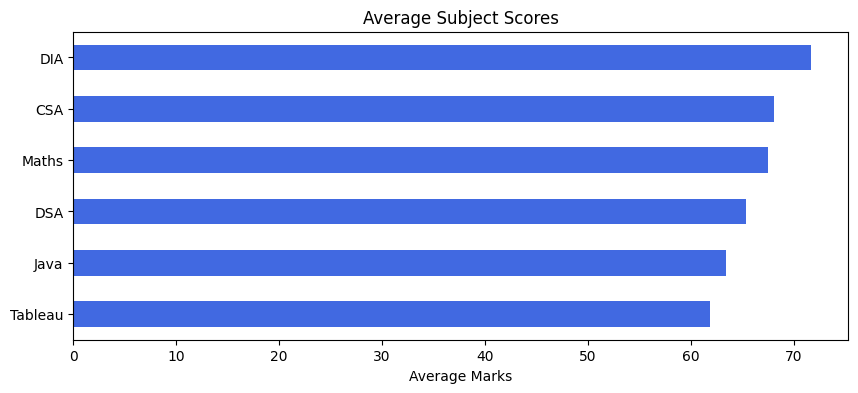

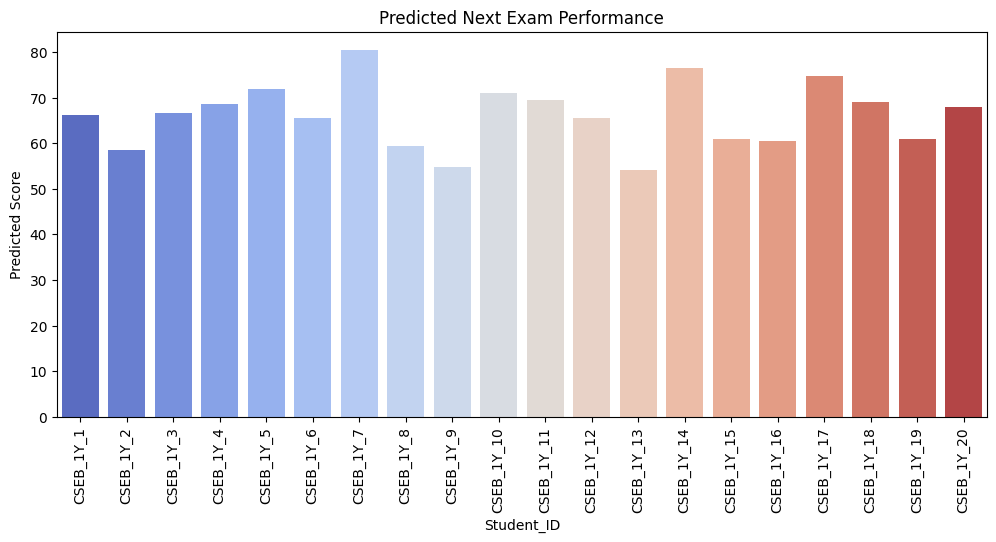

In [20]:
# %%writefile app.py
# import streamlit as st
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.neighbors import NearestNeighbors

# # Streamlit settings
# st.set_page_config(page_title="Campus Resource Assistant", layout="wide")
# st.title("📊 Student Resource Insights & Recommendations")

# # Step 1: Generate Synthetic Data
# np.random.seed(42)
# students = [f"Student_{i}" for i in range(1, 51)]
# resources = ['Lab_1', 'Lab_2', 'Study_Room_1', 'Projector', 'Whiteboard', 'Event_A', 'Workshop_B', 'Library']

# data = []
# for student in students:
#     for resource in resources:
#         usage_score = np.random.choice([0, 1, 2, 3], p=[0.6, 0.2, 0.15, 0.05])
#         data.append([student, resource, usage_score])

# df = pd.DataFrame(data, columns=['student_id', 'resource', 'usage_score'])

# # Step 2: Create pivot table
# pivot = df.pivot_table(index='student_id', columns='resource', values='usage_score', fill_value=0)

# # Step 3: Fit Nearest Neighbors model
# model = NearestNeighbors(metric='cosine', algorithm='brute')
# model.fit(pivot)

# # Sidebar
# st.sidebar.header("🔍 Select a Student")
# selected_student = st.sidebar.selectbox("Choose a student to view recommendations:", pivot.index)

# # Main Section
# st.subheader("📈 Resource Usage Heatmap (Sample of 10 Students)")
# fig, ax = plt.subplots(figsize=(12, 6))
# sample = pivot.sample(10)
# sns.heatmap(sample, annot=True, cmap="YlGnBu", cbar=True, ax=ax)
# st.pyplot(fig)

# st.subheader("🔥 Most Popular Resources")
# fig2, ax2 = plt.subplots(figsize=(10, 4))
# pivot.sum().sort_values().plot(kind='barh', color='mediumseagreen', ax=ax2)
# ax2.set_xlabel("Total Usage Score")
# st.pyplot(fig2)

# st.subheader(f"📚 Recommended Resources for {selected_student}")

# # Step 4: Recommend Resources
# def recommend_resources(student_name, top_n=3):
#     distances, indices = model.kneighbors([pivot.loc[student_name]], n_neighbors=4)
#     similar_students = [pivot.index[i] for i in indices.flatten()[1:]]
#     similar_usage = pivot.loc[similar_students].mean()
#     current_usage = pivot.loc[student_name]
#     recommendations = (similar_usage - current_usage).sort_values(ascending=False)
#     return recommendations.head(top_n)

# # Show recommendation
# recommendations = recommend_resources(selected_student)
# st.table(recommendations.reset_index().rename(columns={'index': 'Resource', 0: 'Recommendation Score'}))

# st.success("✅ Use this data to suggest workshops, study rooms, or tutoring sessions!")

import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Streamlit settings
st.set_page_config(page_title="Faculty Dashboard - Class Performance", layout="wide")
st.title("🎓 Faculty Dashboard - Classwise Student Performance")

# Step 1: Generate Dummy Class Data
np.random.seed(42)
classes = ['CSE-B 1st Year', 'CSE-A 1st Year', 'EC-A 3rd Year', 'ME-B 2nd Year']
students_per_class = {
    'CSE-B 1st Year': [f"CSEB_1Y_{i}" for i in range(1, 21)],
    'CSE-A 1st Year': [f"CSEA_1Y_{i}" for i in range(1, 21)],
    'EC-A 3rd Year': [f"ECA_3Y_{i}" for i in range(1, 20)],
    'ME-B 2nd Year': [f"MEB_2Y_{i}" for i in range(1, 20)]
}

subjects = ['Maths', 'DSA', 'Java', 'DIA', 'CSA', 'Tableau']

data = []
for cls, students in students_per_class.items():
    for student in students:
        performance = np.random.randint(40, 95, size=len(subjects))
        data.append([student, cls] + performance.tolist())

columns = ['Student_ID', 'Class'] + subjects
df = pd.DataFrame(data, columns=columns)

# Sidebar - Class selection
st.sidebar.header("📚 Select Class")
selected_class = st.sidebar.selectbox("Choose a class:", list(students_per_class.keys()))

class_df = df[df['Class'] == selected_class]
st.subheader(f"📊 Performance Overview for {selected_class}")

# Show data
st.dataframe(class_df.set_index('Student_ID')[subjects].style.background_gradient(cmap='YlGnBu'))

# Subject-wise average
st.markdown("### 📘 Subject-wise Average Performance")
avg_scores = class_df[subjects].mean().sort_values()
fig1, ax1 = plt.subplots(figsize=(10, 4))
avg_scores.plot(kind='barh', color='royalblue', ax=ax1)
ax1.set_xlabel("Average Marks")
ax1.set_title("Average Subject Scores")
st.pyplot(fig1)

# Predict upcoming performance
st.markdown("### 🔮 Predict Upcoming Student Performance")
class_df['Average'] = class_df[subjects].mean(axis=1)
class_df['Predicted_Next_Score'] = class_df['Average'] + np.random.normal(0, 5, size=len(class_df))
class_df['Predicted_Next_Score'] = class_df['Predicted_Next_Score'].clip(0, 100)

fig2, ax2 = plt.subplots(figsize=(12, 5))
sns.barplot(x='Student_ID', y='Predicted_Next_Score', data=class_df, palette='coolwarm', ax=ax2)
plt.xticks(rotation=90)
ax2.set_ylabel("Predicted Score")
ax2.set_title("Predicted Next Exam Performance")
st.pyplot(fig2)

# Risk prediction
st.markdown("### ⚠️ Students at Risk")
students_at_risk = class_df[class_df['Predicted_Next_Score'] < 50]
if not students_at_risk.empty:
    st.warning("These students might need intervention or support:")
    st.dataframe(students_at_risk[['Student_ID', 'Average', 'Predicted_Next_Score']])
else:
    st.success("No students are currently at risk based on prediction.")

st.markdown("---")
st.markdown("✅ This dashboard helps faculty monitor class performance, predict outcomes, and take early action to support students.")



In [14]:
!pip install pyngrok --quiet

In [21]:
!ngrok config add-authtoken 2jkOvitLc2DfR3NOY6W726cjwVv_6mHXzsmWCY98gHnfYngJZ

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [22]:
# Add your ngrok token
!ngrok config add-authtoken 2jkOvitLc2DfR3NOY6W726cjwVv_6mHXzsmWCY98gHnfYngJZ

from pyngrok import ngrok

# Kill previous tunnels
ngrok.kill()

# Connect streamlit port using http protocol
public_url = ngrok.connect(8501, "http")
print(f"🌍 Streamlit app is live at: {public_url}")

# Run your streamlit app
!streamlit run app.py &>/content/logs.txt &


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
🌍 Streamlit app is live at: NgrokTunnel: "https://1afd-34-75-33-100.ngrok-free.app" -> "http://localhost:8501"


In [46]:
%%writefile student_dashboard.py
import streamlit as st
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

st.set_page_config(page_title="Student Behavior Analytics", layout="wide")
st.title("📊 Student Behavior Analytics & Performance Prediction")

# Simulated dataset
np.random.seed(42)
n_students = 100
data = pd.DataFrame({
    "Student_ID": [f"S{i+1:03d}" for i in range(n_students)],
    "Library_Usage": np.random.randint(0, 10, n_students),
    "Lab_Usage": np.random.randint(0, 10, n_students),
    "Event_Participation": np.random.randint(0, 5, n_students),
    "StudyRoom_Bookings": np.random.randint(0, 7, n_students)
})
data["Total_Usage"] = data.iloc[:, 1:5].sum(axis=1)
data["Engagement_Label"] = pd.cut(data["Total_Usage"],
                                  bins=[-1, 10, 20, 40],
                                  labels=["Disengaged", "Moderate", "Active"])

st.subheader("📚 Simulated Data")
st.dataframe(data.head())

# Classification
X = data[["Library_Usage", "Lab_Usage", "Event_Participation", "StudyRoom_Bookings"]]
y = data["Engagement_Label"]
clf = RandomForestClassifier()
clf.fit(X, y)
data["Predicted_Engagement"] = clf.predict(X)

selected_student = st.selectbox("Select a Student ID", data["Student_ID"])
student_row = data[data["Student_ID"] == selected_student].iloc[0]

# Gauge chart
def plot_gauge(value, label):
    fig = go.Figure(go.Indicator(
        mode="gauge+number",
        value=value,
        title={'text': label},
        gauge={
            'axis': {'range': [0, 40]},
            'bar': {'color': "royalblue"},
            'steps': [
                {'range': [0, 10], 'color': "red"},
                {'range': [10, 20], 'color': "orange"},
                {'range': [20, 40], 'color': "green"}
            ]
        }
    ))
    return fig

st.subheader("📊 Student Engagement Gauge")
gauge_fig = plot_gauge(student_row["Total_Usage"], f"{selected_student}'s Engagement Score")
st.plotly_chart(gauge_fig)

# Clustering
st.subheader("📌 Student Clustering (KMeans)")
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
data["Cluster"] = kmeans.fit_predict(scaled_data)

scatter = go.Figure()
scatter.add_trace(go.Scatter(
    x=data["Library_Usage"],
    y=data["Lab_Usage"],
    mode='markers',
    marker=dict(color=data["Cluster"], size=10, colorscale='Viridis'),
    text=data["Student_ID"]
))
scatter.update_layout(title="Clustering by Library vs Lab Usage", xaxis_title="Library Usage", yaxis_title="Lab Usage")
st.plotly_chart(scatter)


Overwriting student_dashboard.py


In [47]:
!pip install pyngrok streamlit --quiet

from pyngrok import ngrok
import os

# Kill existing tunnels
ngrok.kill()

# Create app.py from code above, then:
public_url = ngrok.connect(8501)
print(f"🌍 App is live at: {public_url}")

!streamlit run student_dashboard.py &>/content/logs.txt &


🌍 App is live at: NgrokTunnel: "https://8b0d-34-75-33-100.ngrok-free.app" -> "http://localhost:8501"
